In [66]:
!pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
# data sample
#data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# prepare cross validation
kfold = KFold(n_splits=5,shuffle = True, random_state = 2)
# enumerate splits
result = next(kfold.split(df), None)

#train and test data
train = df.iloc[result[0]]
test =  df.iloc[result[1]]


#STEP1:define and fit the model

#cash_in_df = df[df['type'].eq('CASH_IN')]
cash_in_df = df #or train or test
#{'typex': df.loc[df['type'] == 'CASH_OUT','amount']}

In [4]:
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
13,11.0,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
14,12.0,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0
16,12.0,1.103215,-0.040296,1.267332,1.289091,-0.735997,0.288069,-0.586057,0.189380,0.782333,...,-0.024612,0.196002,0.013802,0.103758,0.364298,-0.382261,0.092809,0.037051,12.99,0
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284778,172764.0,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,...,0.003530,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,80.00,0
284780,172766.0,-1.727503,1.108356,2.219561,1.148583,-0.884199,0.793083,-0.527298,0.866429,0.853819,...,-0.094708,0.236818,-0.204280,1.158185,0.627801,-0.399981,0.510818,0.233265,30.00,0
284785,172768.0,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0
284792,172774.0,-0.724123,1.485216,-1.132218,-0.607190,0.709499,-0.482638,0.548393,0.343003,-0.226323,...,0.414621,1.307511,-0.059545,0.242669,-0.665424,-0.269869,-0.170579,-0.030692,3.99,0


In [5]:
#STEP1:define and fit the model

#cash_in_df = df[df['type'].eq('Amount')]
#{'typex': df.loc[df['type'] == 'CASH_OUT','amount']}

cash_in_df = train # or df or test


In [6]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
#data to fit


In [7]:

model.fit(cash_in_df[['Amount']])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, n_estimators=50)

In [8]:
#STEP 2: add scores and anomaly column
cash_in_df['scores']=model.decision_function(cash_in_df[['Amount']])
cash_in_df['anomaly']=model.predict(cash_in_df[['Amount']])
cash_in_df.head(20)

/tmp/ipykernel_64/571958048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_in_df['scores']=model.decision_function(cash_in_df[['Amount']])
/tmp/ipykernel_64/571958048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_in_df['anomaly']=model.predict(cash_in_df[['Amount']])


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scores,anomaly
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.122146,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-0.068722,-1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.036229,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.045099,1
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,0.131801,1
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,0.133752,1
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,0.096689,1
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,0.044330,1
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,0.131252,1
10,10.0,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0,0.136827,1


In [9]:
#print anomalies
anomaly=cash_in_df.loc[cash_in_df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

            Time        V1        V2        V3        V4        V5        V6  \
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
20          16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
51          36.0 -1.004929 -0.985978 -0.038039  3.710061 -6.631951  5.122103   
64          42.0 -0.522666  1.009923  0.276470  1.475289 -0.707013  0.355243   
89          59.0 -0.773293 -4.146007 -0.932038  0.027094 -1.698307  0.460188   
...          ...       ...       ...       ...       ...       ...       ...   
284733  172726.0 -1.353026  0.289945  0.173684 -3.780442 -1.173016 -0.159307   
284735  172727.0 -1.661169 -0.565425  0.294268 -1.549156 -2.301359  2.365956   
284748  172738.0  1.634178 -0.486939 -1.975967  0.495364  0.263635 -0.713049   
284753  172743.0  1.465737 -0.618047 -2.851391  1.425282  0.893893 -0.958325   
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  .

In [10]:
#STEP 2: add/convert the similarity into dissimilarity scores
cash_in_df['scores']=(1/cash_in_df['scores']) -1
#df['anomaly']=model.predict(df[['amount']])
cash_in_df.head(20)

/tmp/ipykernel_64/2831741684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_in_df['scores']=(1/cash_in_df['scores']) -1


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scores,anomaly
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,7.186953,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-15.551445,-1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,26.601923,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,21.173484,1
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,6.587217,1
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0,6.476544,1
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0,9.342483,1
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,21.558062,1
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,6.618960,1
10,10.0,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0,6.308486,1


In [11]:
#STEP 3: USE AHC ON THE DATA
selected_data = cash_in_df[["Amount","scores","anomaly"]]
selected_data.head(10)

,Amount,scores,anomaly
1,2.69,7.186953,1
2,378.66,-15.551445,-1
3,123.50,26.601923,1
4,69.99,21.173484,1
5,3.67,6.587217,1
6,4.99,6.476544,1
7,40.80,9.342483,1
8,93.20,21.558062,1
9,3.68,6.618960,1
10,7.80,6.308486,1


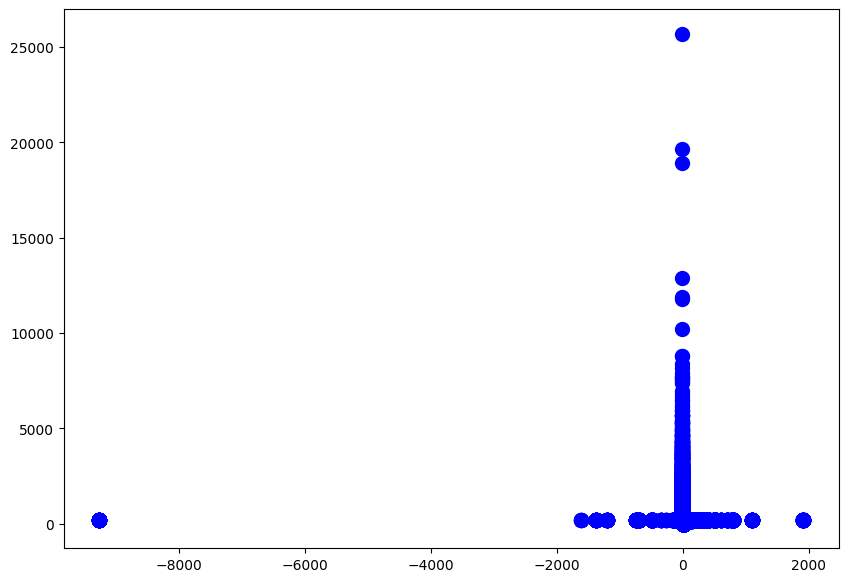

In [12]:
##test the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(selected_data[["scores"]], selected_data[["Amount"]], s=100, c='blue')

In [13]:
#clean up the data values
selected_data = selected_data.replace([np.inf, -np.inf], np.nan)
selected_data = selected_data.dropna()
selected_data = selected_data.reset_index()

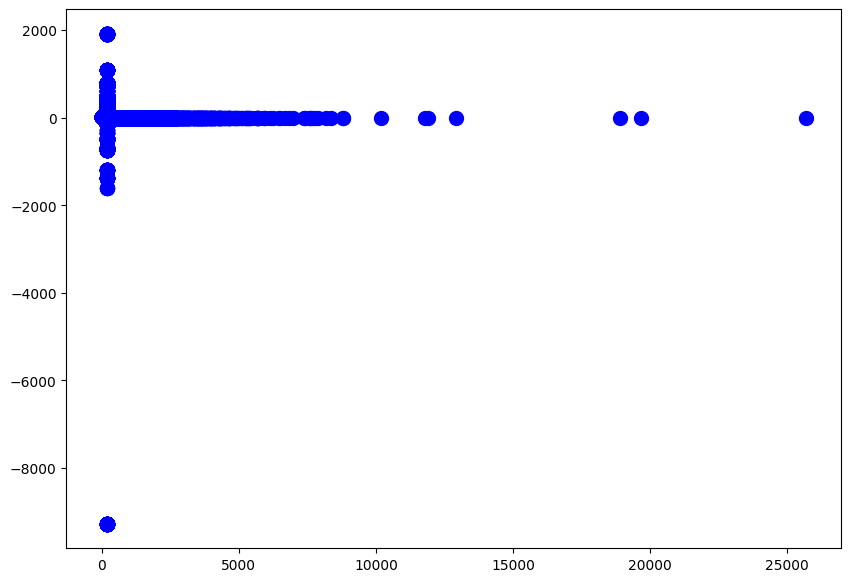

In [14]:
##test the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(selected_data[["Amount"]], selected_data[["scores"]], s=100, c='blue')

In [15]:
#normalize the data
from sklearn.preprocessing import normalize
data_scaled = normalize(selected_data)
data_scaled = pd.DataFrame(data_scaled, columns=selected_data.columns)
data_scaled.head(10)

,index,Amount,scores,anomaly
0,0.128154,0.344735,0.921038,0.128154
1,0.005277,0.999140,-0.041034,-0.002639
2,0.023739,0.977273,0.210505,0.007913
3,0.054616,0.955641,0.289102,0.013654
4,0.549284,0.403174,0.723650,0.109857
5,0.588785,0.489673,0.635549,0.098131
6,0.164904,0.961152,0.220087,0.023558
7,0.083333,0.970834,0.224563,0.010417
8,0.762402,0.311738,0.560701,0.084711
9,0.704231,0.549300,0.444263,0.070423


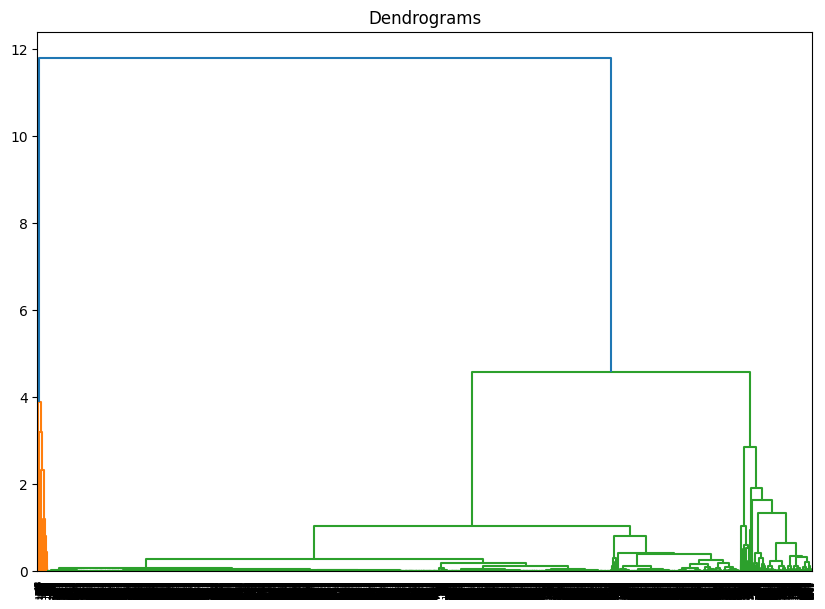

In [16]:
#show the dendograms
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled.head(10000), method='ward'))

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(data_scaled.head(10000))

In [18]:
#get the silhoutte score
from sklearn.metrics import silhouette_score
silhouette_score(data_scaled.head(10000),clusters)   #SILHOUTTE SCORE ON MODIFIED AGGROMELATIVE CLUSTERING

0.9529859226330017

In [19]:
#silhoutte score of atleast 0.6 is good for clustering(shows the goodness of the clustering technique)

#repeat the experiment without doing the comparison
#get the calinski_harabasz_score for the AHC
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(data_scaled.head(10000),clusters)

16559.908955287483

In [21]:
#plot the scatter
X = data_scaled.head(10000).values

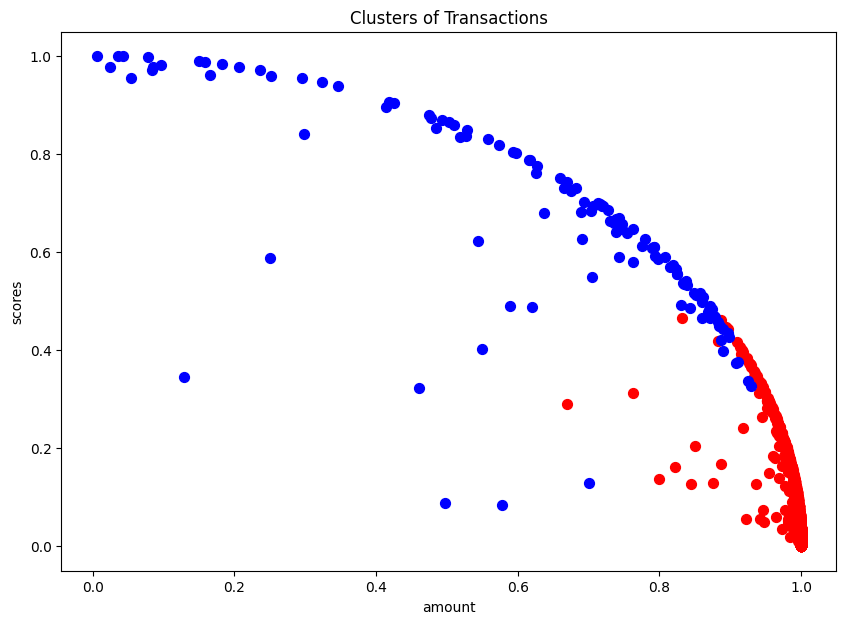

In [22]:
plt.figure(figsize=(10, 7))  
plt.scatter(X[clusters==0, 0], X[clusters==0, 1], s=50, c='red', label ='Cluster 1')
plt.scatter(X[clusters==1, 0], X[clusters==1, 1], s=50, c='blue', label ='Cluster 2')
plt.title('Clusters of Transactions')
plt.ylabel('scores')
plt.xlabel('amount')
plt.show()

##the markers have been reduced to size 50

In [23]:
#evaluate the model based on a threshold
outliers_counter = len(df[df['Amount'] > 120])
outliers_counter

48728

In [24]:
#calculate the percentage of the outliers found from the total number of outliers
print("Accuracy percentage:", 100*list(cash_in_df['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 46.755458873748154


In [25]:
#step 4 determine the number of clusters --using elbow

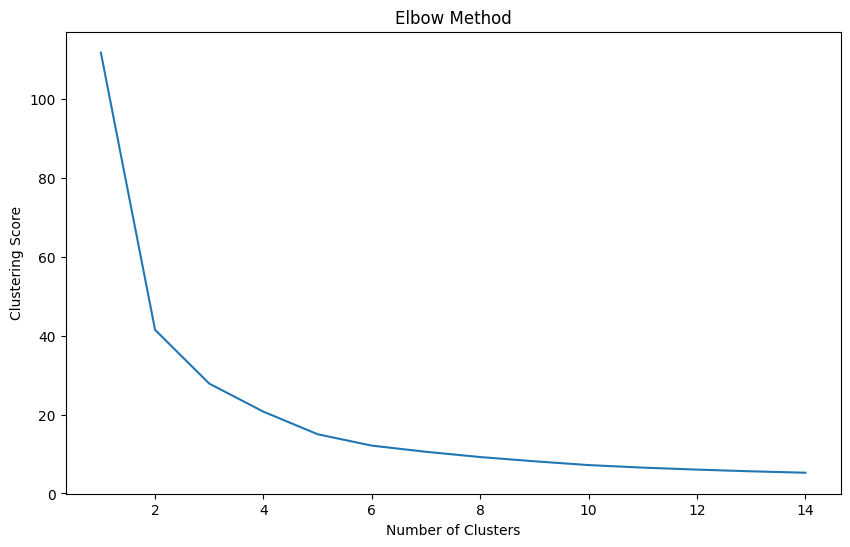

In [26]:
from sklearn.cluster import KMeans
#try kmeans
individual_clustering_score = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    individual_clustering_score.append(kmeans.inertia_) 
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 15), individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [27]:
#kmeans prediction
#Fit the model and predict
kmeans= KMeans(n_clusters = 3, random_state = 42) #TEST WITH 2 OR 3 TO IDENTIFY THE SIHOUTTE SCORE


kmeans.fit(X)


pred = kmeans.predict(X)

pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [28]:
silhouette_score(X,pred) #SILHOUTTE SCORE ON KMEANS

0.8969135695569548

In [29]:
calinski_harabasz_score(X,pred) #for the kmeans -----------------------------------

15051.185888747956

In [30]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=1000).fit(X)  #INCREASE THE SAMPLES TO IDENTIFY THE CLUSTERS
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 92


In [31]:
silhouette_score(X,labels) #TO SHOW THE EFFECTIVENESS OF DBSCAN ON THE DATA

0.9559370720913414

In [32]:
calinski_harabasz_score(X,labels)  ###for dbscan ----------------------------------

13380.825410609708

In [33]:
#import the libraries
#introduce the KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

#importing of the dataset and slicing it into independent and dependent variables
X = test.iloc[:, [1, 2, 3]].values #can also use the KFold data ===df.iloc or train.iloc or test.iloc
##X = df.iloc[:, [1, 2, 3]].values
y = test.iloc[:, -1].values

#encode the labels
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
ac = accuracy_score(y_test,y_pred)
#ac is
print("Accuracy:",ac)


Accuracy: 0.9992100412534012


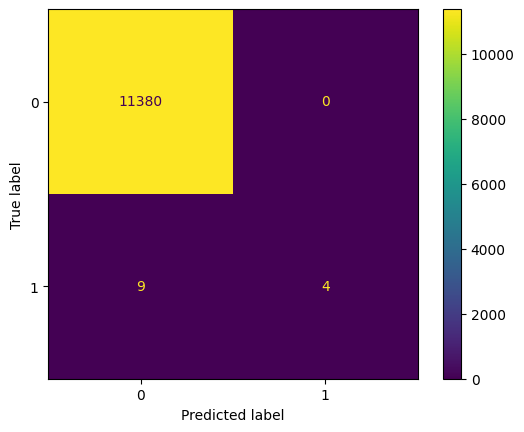

In [34]:
#display the confusion matrix
cm2 = confusion_matrix(y_test, y_pred,labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=classifier.classes_)
disp.plot()
plt.show()